### Color Extraction 

In [11]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [1]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 1,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df


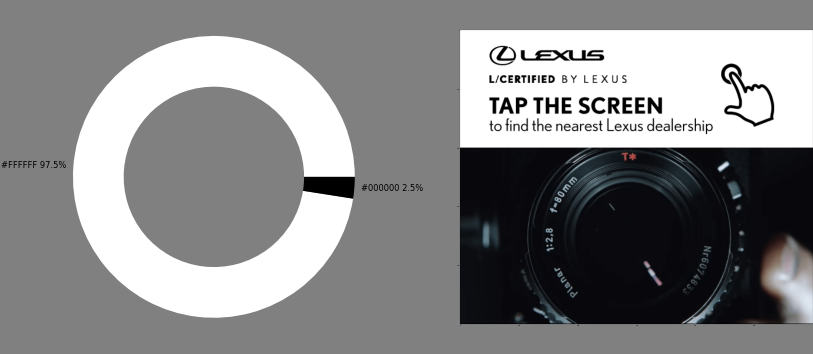

,c_code,rgb,occurrence
0,#FFFFFF,"(255, 255, 255)",292584
1,#000000,"(0, 0, 0)",7416


In [5]:
identify_color_composition('/home/birhanu_gebisa/week-11/ad_optimisation/data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png',tolerance=100,limit=8, visualize=True)

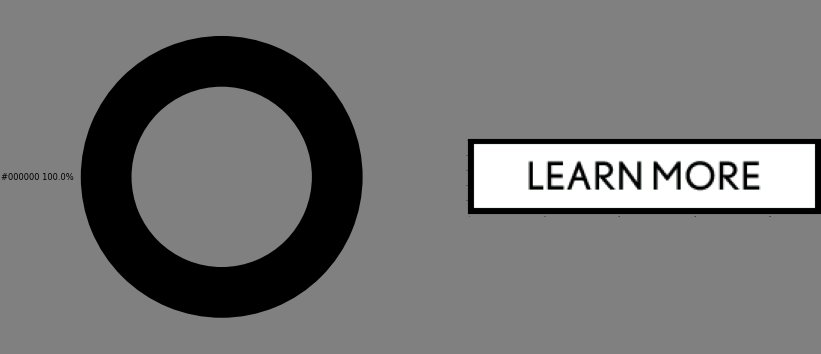

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",3577


In [7]:
identify_color_composition(
    '../data/Assets/5a48ffcbf611f167ecbb884e807f31f6/cta.png', limit=3 ,visualize=True)